**Air Emissions Exploratory Data Analysis**
Dataset retrieved from Kaggle:
https://www.kaggle.com/sogun3/uspollution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import scipy.stats as sc
import seaborn as sns
import matplotlib as mpl


In [2]:
# Reading in the data from https://www.kaggle.com/sogun3/uspollution
data = pd.read_csv('/home/slindhult/assignments/Capstone-1/Data/pollution_us_2000_2016.csv')

In [3]:
data.shape

(1746661, 29)

In [4]:
data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [5]:
data.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [6]:
#Identifying null values
for col in data.columns:
    print((col, data[col].isnull().sum()))

('Unnamed: 0', 0)
('State Code', 0)
('County Code', 0)
('Site Num', 0)
('Address', 0)
('State', 0)
('County', 0)
('City', 0)
('Date Local', 0)
('NO2 Units', 0)
('NO2 Mean', 0)
('NO2 1st Max Value', 0)
('NO2 1st Max Hour', 0)
('NO2 AQI', 0)
('O3 Units', 0)
('O3 Mean', 0)
('O3 1st Max Value', 0)
('O3 1st Max Hour', 0)
('O3 AQI', 0)
('SO2 Units', 0)
('SO2 Mean', 0)
('SO2 1st Max Value', 0)
('SO2 1st Max Hour', 0)
('SO2 AQI', 872907)
('CO Units', 0)
('CO Mean', 0)
('CO 1st Max Value', 0)
('CO 1st Max Hour', 0)
('CO AQI', 873323)


In [7]:
#Removing negative values and removing them
a = data.copy()
purged = a[(a[['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour']] >=0).all(1)]


In [8]:
#Removing unwanted columns and grouping/aggregating to remove duplicate dates and nan values
cleaned = purged.drop(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'County', 'City', 'NO2 Units',
       'O3 Units',
       'SO2 Units',
       
       'CO Units'], axis=1)
cleaned['Date'] = cleaned['Date Local']

clean = cleaned.groupby(['Date Local', 'Address','State']).agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})
clean = clean.reset_index()
clean = clean.drop(['Address'],axis=1)
clean.shape

(407557, 18)

In [9]:
#checking the cleaned data
for col in clean.columns:
    print((col, clean[col].isnull().sum()))

('Date Local', 0)
('State', 0)
('NO2 Mean', 0)
('NO2 1st Max Value', 0)
('NO2 1st Max Hour', 0)
('NO2 AQI', 0)
('O3 Mean', 0)
('O3 1st Max Value', 0)
('O3 1st Max Hour', 0)
('O3 AQI', 0)
('SO2 Mean', 0)
('SO2 1st Max Value', 0)
('SO2 1st Max Hour', 0)
('SO2 AQI', 589)
('CO Mean', 0)
('CO 1st Max Value', 0)
('CO 1st Max Hour', 0)
('CO AQI', 225)


In [10]:
# Understanding what data is included - looks like some states are missing
states = data['State'].unique()
states_list = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
print([state for state in states_list if state not in states])

['Guam', 'Mississippi', 'Montana', 'Nebraska', 'Puerto Rico', 'Vermont', 'West Virginia']


In [11]:
clean['month-day'] = clean['Date Local'].apply(lambda x: x[-5:]) 

In [12]:
clean.describe()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,406968.000000,407557.000000,407557.000000,407557.000000,407332.000000
mean,13.038571,25.728235,11.739090,24.202697,0.026084,0.039235,10.178661,36.015476,1.931254,4.623162,9.644190,7.348132,0.371095,0.630276,7.909619,6.079422
std,9.600823,16.108238,7.871853,15.263053,0.011424,0.015341,3.986113,19.680719,2.812063,7.534034,6.333533,12.090029,0.318065,0.629971,6.742213,5.967187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.912500,13.000000,5.000000,12.000000,0.017792,0.029000,9.000000,25.000000,0.276191,0.800000,4.500000,1.000000,0.186503,0.250000,3.000000,2.000000
50%,10.958333,24.000000,9.000000,23.000000,0.025875,0.038000,10.000000,33.000000,1.000000,2.000000,9.500000,3.000000,0.294152,0.450000,6.500000,5.000000
75%,18.041667,36.000000,20.000000,34.000000,0.033917,0.048000,11.000000,42.000000,2.417080,5.300000,13.500000,9.000000,0.468750,0.780000,11.000000,8.000000
max,139.541667,267.000000,23.000000,132.000000,0.095083,0.141000,23.000000,218.000000,321.612500,350.800000,23.000000,200.000000,7.151993,17.700000,23.000000,201.000000


In [13]:
state = clean[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [14]:
# Mean pollutants by state
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [15]:
s

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
State,,,,,,,,,,,,,,,,
Alabama,9.437204,23.040774,13.154839,21.298065,0.024689,0.038560,9.325161,36.972903,1.043634,4.265161,10.769032,7.095855,0.213009,0.408284,9.452903,3.852903
Alaska,11.332871,21.076518,12.220648,19.580972,0.012790,0.019101,10.350202,17.712551,6.092910,9.671053,9.992915,14.506073,0.423515,0.677419,10.128543,6.528340
Arizona,19.071376,38.333948,14.229785,36.045417,0.024868,0.042875,10.115597,38.739995,1.341550,2.719493,10.313373,4.204401,0.488315,0.980713,9.512264,9.166862
Arkansas,9.609277,22.584360,12.176836,21.058649,0.025664,0.038185,10.077310,34.363152,1.550031,2.474504,9.629591,3.411286,0.426547,0.571838,7.963344,6.041321
California,13.681822,25.665369,11.245909,24.191528,0.026018,0.038680,10.201992,35.398964,1.184825,2.402357,8.528772,3.724780,0.450312,0.776474,7.449775,7.466025
Colorado,19.658481,38.071889,10.619244,35.951777,0.023500,0.038103,10.033139,34.473546,1.512454,5.993726,9.047880,10.632499,0.444089,0.815677,8.682665,7.742338
Connecticut,9.062723,19.729596,10.434771,18.599326,0.028883,0.040338,10.474394,37.161725,0.920261,2.346806,10.769340,3.258073,0.251780,0.368023,8.245216,3.602670
Country Of Mexico,20.314785,40.270050,13.218960,37.960570,0.021900,0.036075,9.617450,31.928691,1.951999,4.201804,10.847735,6.571728,0.853698,1.982506,10.283767,17.698699
Delaware,11.591813,23.212101,11.096810,21.557756,0.026506,0.038095,10.108911,35.410341,1.015886,2.193729,10.991199,2.828383,0.261773,0.400968,8.914741,3.839384


In [16]:
day = clean[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI','month-day']].copy()

In [17]:
#Mean pollutant by state and day
day_state = day.groupby(['State','month-day']).agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [18]:
byday = clean[[
       'month-day','NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [19]:
#pollutant just by day
eachday = byday.groupby('month-day').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [20]:
eachday

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
month-day,,,,,,,,,,,,,,,,
01-01,14.569473,26.484119,12.183402,24.929303,0.018081,0.027562,10.603484,23.962602,1.919720,3.917444,8.603996,6.000000,0.512314,0.948258,9.721568,9.095897
01-02,16.422122,28.580289,13.532508,26.884933,0.016650,0.025648,10.086687,22.273478,1.918562,4.083566,9.837203,6.319028,0.514306,0.908524,10.098039,8.851393
01-03,17.631386,30.452210,13.321172,28.638232,0.015959,0.024970,10.017472,21.710175,2.062527,4.310946,10.263361,6.689106,0.543842,0.993317,10.013104,9.493313
01-04,18.496375,30.719464,12.791967,28.910917,0.015558,0.024457,10.292997,21.294027,2.289908,4.799820,10.316941,7.412887,0.570610,1.018490,8.922331,9.882595
01-05,18.505704,30.986708,13.062372,29.139571,0.015575,0.024257,10.254601,21.109407,2.239597,4.724463,10.254346,7.359918,0.567873,1.023884,9.533487,9.868609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,16.669456,28.717194,13.625527,27.048523,0.016430,0.025414,9.810127,21.952004,1.923549,4.130011,10.330960,6.343552,0.515615,0.916576,9.881329,8.939746
12-28,17.559313,29.670507,13.104651,27.945560,0.016071,0.025424,10.932347,21.991015,2.167369,4.540407,10.112579,6.916931,0.538629,0.952242,9.191068,9.379894
12-29,17.206335,29.744293,12.657068,27.980105,0.015914,0.025143,10.243455,21.746073,2.097435,4.341963,10.270681,6.653040,0.527064,0.946584,9.668325,9.305236


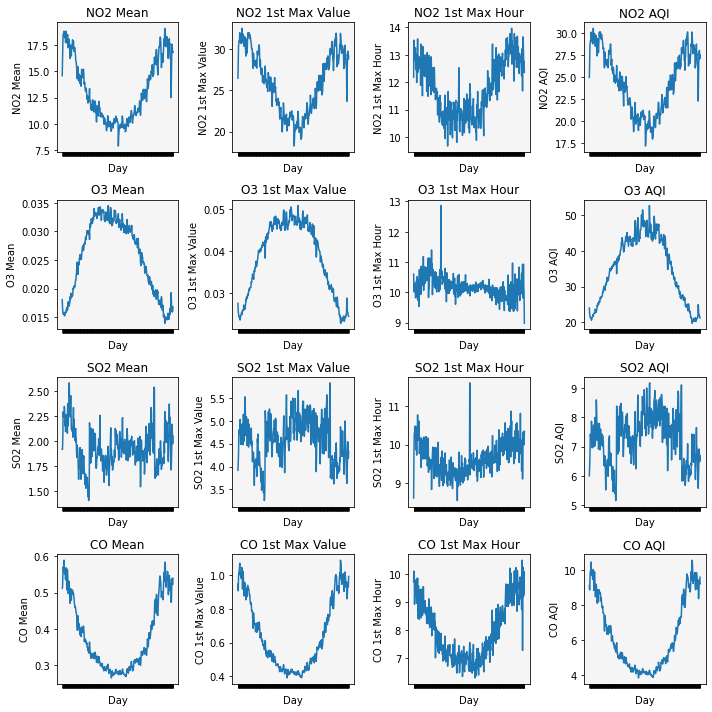

In [21]:
# Graphing mean pollutant by day of the year
fig, axs = plt.subplots(4,4,figsize=(10,10))

axs=axs.flatten()
cols = eachday.columns

for i, col in enumerate(cols):   
    axs[i].plot(eachday.index,eachday[col])
    axs[i].set_title(col)
    axs[i].set_xlabel('Day')
    axs[i].set_ylabel(col)
    axs[i].set_facecolor('#F5F5F5')
    axs[i].xaxis.set_major_formatter(plt.NullFormatter())
fig.tight_layout()  
plt.savefig('byday.jpg', dpi=300)

In [22]:
clean['year'] = clean['Date Local'].apply(lambda x: x[:4]) 

In [23]:
clean.head()

,Date Local,State,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,month-day,year
0,2000-01-01,Virginia,31.000000,41.0,23.0,39.0,0.002750,0.006,11.0,5.0,11.645834,16.8,10.0,26.0,1.244518,1.5,2.5,16.0,01-01,2000
1,2000-01-01,California,5.272727,19.0,17.0,18.0,0.025917,0.028,14.0,24.0,2.524026,5.5,17.0,10.0,0.270933,0.3,5.0,3.0,01-01,2000
2,2000-01-01,California,17.652174,27.0,2.0,25.0,0.019333,0.029,14.0,25.0,2.338961,3.0,8.0,4.0,0.447343,0.7,4.0,7.0,01-01,2000
3,2000-01-01,California,9.304348,24.0,7.0,23.0,0.032917,0.041,10.0,35.0,0.402795,2.3,9.5,4.0,0.466787,1.0,9.0,9.0,01-01,2000
4,2000-01-01,Louisiana,31.083333,72.0,18.0,70.0,0.023350,0.038,10.0,32.0,7.737500,12.3,2.0,21.0,0.845943,1.5,20.5,14.0,01-01,2000


In [24]:
year = clean[[
         'NO2 Mean', 'NO2 AQI',
       'O3 Mean','O3 AQI',
       'SO2 Mean','SO2 AQI',
        'CO Mean','CO AQI', 'year']].copy()

In [25]:
# Mean pollutants by year
y = year.groupby('year').agg({'NO2 Mean':'mean',
       'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO AQI':'mean'})

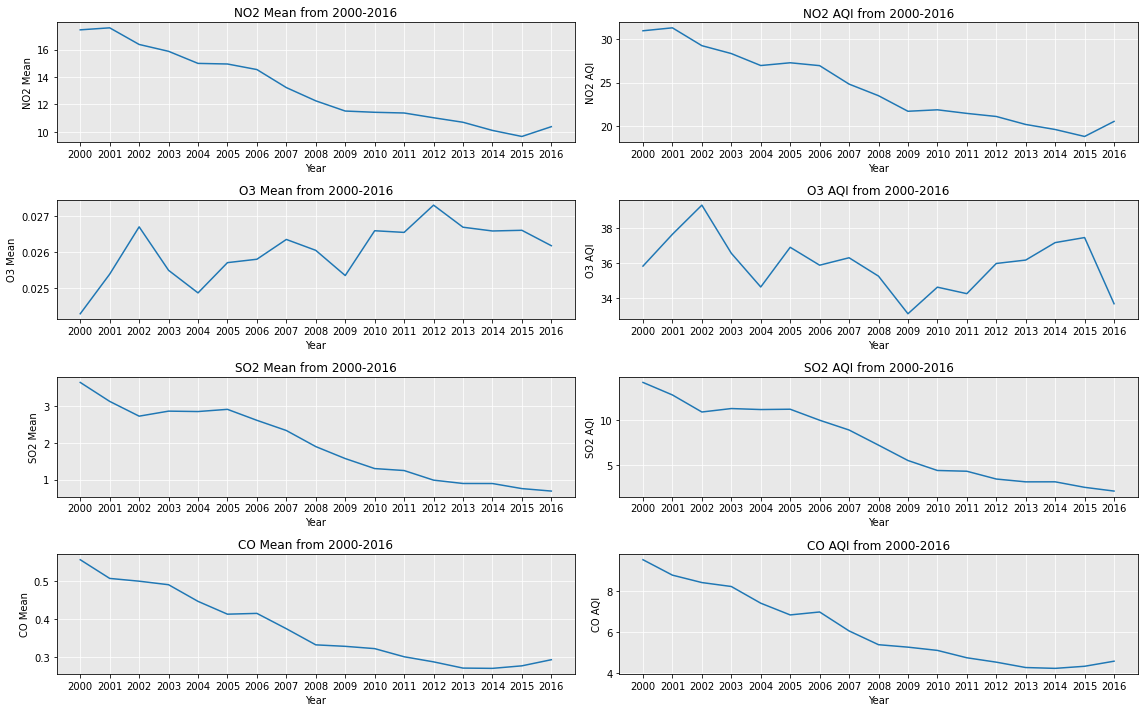

In [26]:
fig, axs = plt.subplots(4,2,figsize=(16,10))

ycols = y.columns

axs=axs.flatten()
for i, col in enumerate(ycols):   
    axs[i].plot(y.index,y[col])
    axs[i].set_title(f'{col} from 2000-2016')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel(f'{col}')
    axs[i].set_facecolor('#E8E8E8')
    axs[i].grid(lw =.75, color='white')
fig.tight_layout()  
plt.savefig('overtime.jpg', dpi=300)

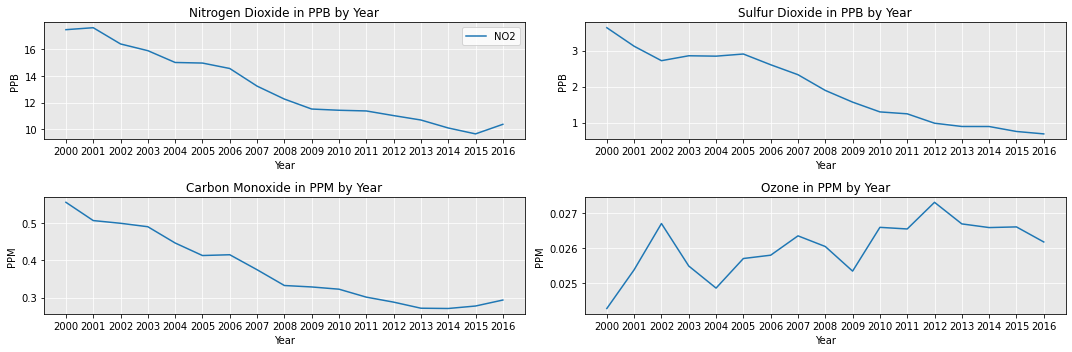

In [27]:
fig, ax = plt.subplots(2,2, figsize=(15,5))

#Graph NO2 by year - ppb
ax[0,0].plot(y.index,y['NO2 Mean'], label='NO2')
ax[0,0].set_title('Nitrogen Dioxide in PPB by Year')
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('PPB')
ax[0,0].legend();
ax[0,0].set_facecolor('#E8E8E8')
ax[0,0].grid(lw =.75, color='white')

#Graph SO2 by year - ppb
ax[0,1].plot(y.index,y['SO2 Mean'], label='SO2')
ax[0,1].set_title('Sulfur Dioxide in PPB by Year')
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('PPB')
ax[0,1].set_facecolor('#E8E8E8')
ax[0,1].grid(lw =.75, color='white')

#Graph CO by year -ppm
ax[1,0].plot(y.index,y['CO Mean'], label='CO')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('PPM')
ax[1,0].set_title('Carbon Monoxide in PPM by Year')
ax[1,0].set_facecolor('#E8E8E8')
ax[1,0].grid(lw =.75, color='white')

#Graph O3 by year -ppm
ax[1,1].plot(y.index,y['O3 Mean'], label='O3')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('PPM')
ax[1,1].set_title('Ozone in PPM by Year')
ax[1,1].set_facecolor('#E8E8E8')
ax[1,1].grid(lw =.75, color='white')

fig.tight_layout()  


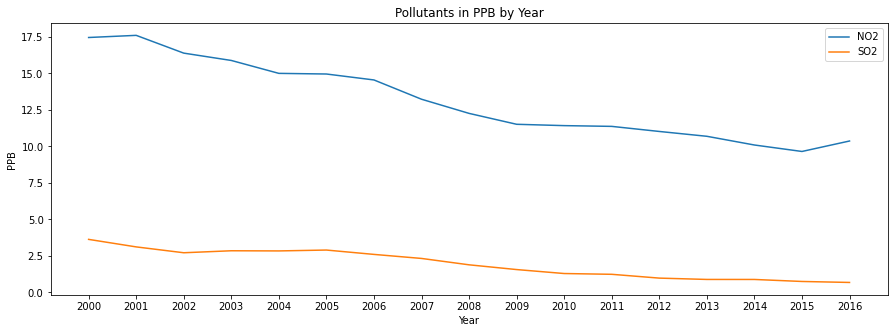

In [28]:
#Graphing ppm pollutants together by year
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(y.index,y['NO2 Mean'], label='NO2')
ax.plot(y.index,y['SO2 Mean'], label='SO2')
ax.set_xlabel('Year')
ax.set_ylabel('PPB')
ax.set_title('Pollutants in PPB by Year')


ax.legend();

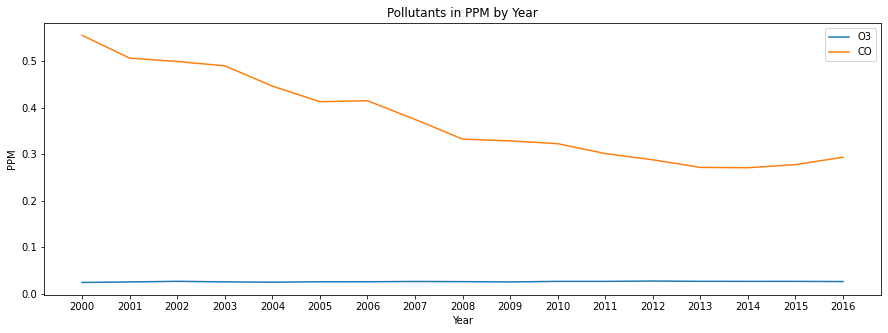

In [29]:
#Graphing ppm pollutants together by year... not the most exciting visualization
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(y.index,y['O3 Mean'], label='O3')
ax.plot(y.index,y['CO Mean'], label='CO')
ax.set_xlabel('Year')
ax.set_ylabel('PPM')
ax.set_title('Pollutants in PPM by Year')


ax.legend();

In [30]:
groups = clean.copy()
groups['Total AQI'] = groups[['CO AQI','SO2 AQI','O3 AQI','NO2 AQI']].max(axis=1)
groups['AQI Level'] = pd.cut(groups['Total AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])


In [31]:
test = groups.agg({'AQI Level':'value_counts'})
#test = test.reset_index()
#test['index'][0] = 'Good'
#test['index'][1] = 'Moderate'
#test['AQI Level'][0] = 98762
#test['AQI Level'][1] = 242257
#test = test.set_index('index')

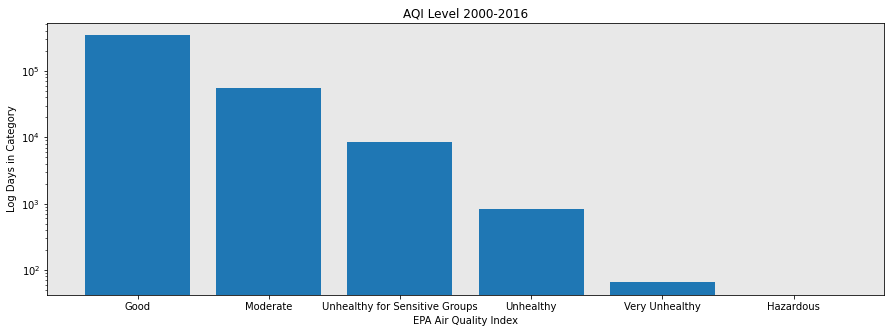

In [32]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(test.index,test['AQI Level']);
plt.ylabel('Log Days in Category')
plt.xlabel('EPA Air Quality Index');
ax.set_title('AQI Level 2000-2016')
ax.set_facecolor('#E8E8E8')
ax.set_yscale('log')

plt.savefig('Images/leveldays.jpg', dpi=300)

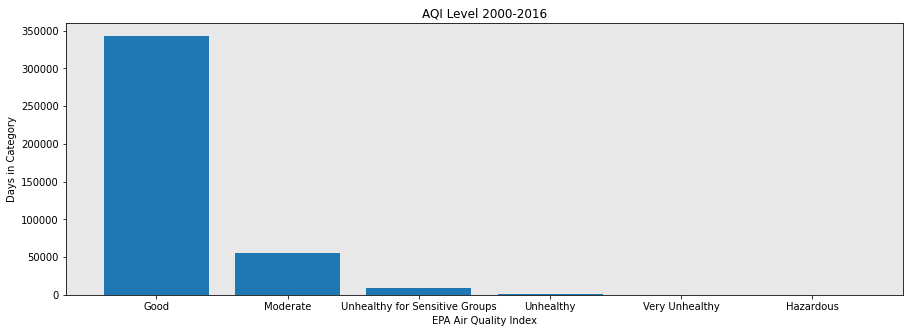

In [101]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(test.index,test['AQI Level']);
plt.ylabel('Days in Category')
plt.xlabel('EPA Air Quality Index');
ax.set_title('AQI Level 2000-2016')
ax.set_facecolor('#E8E8E8')


plt.savefig('Images/linearleveldays.jpg', dpi=300)

In [33]:
a = groups[groups['AQI Level']=='Very Unhealthy'].sort_values('Total AQI')
b = pd.DataFrame({'Unhealthy': a['State'].value_counts()})
a.sort_values('Total AQI', ascending=False)

,Date Local,State,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,month-day,year,Total AQI,AQI Level
330308,2013-06-29,California,22.969565,35.3,23.0,33.0,0.064458,0.122000,11.000000,218.0,...,4.5,1.0,0.370290,0.5000,2.5,6.0,06-29,2013,218.0,Very Unhealthy
169458,2007-07-04,Country Of Mexico,19.695652,37.0,8.0,35.0,0.058625,0.141000,10.000000,211.0,...,22.5,10.0,0.404438,0.7000,9.0,6.0,07-04,2007,211.0,Very Unhealthy
82528,2003-08-17,California,21.826087,43.0,0.0,41.0,0.066958,0.140000,10.000000,210.0,...,1.0,0.0,0.704167,1.0500,6.0,10.0,08-17,2003,210.0,Very Unhealthy
196749,2008-06-27,California,20.000000,43.0,5.0,41.0,0.058555,0.089667,7.333333,207.0,...,11.5,6.0,0.780706,1.0500,7.0,11.0,06-27,2008,207.0,Very Unhealthy
9351,2000-06-10,Pennsylvania,19.625000,44.0,7.0,42.0,0.083333,0.131000,12.000000,207.0,...,23.0,41.0,0.635417,0.8500,8.0,9.0,06-10,2000,207.0,Very Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9319,2000-06-10,New York,29.958333,52.0,0.0,49.0,0.079458,0.117000,11.000000,201.0,...,1.5,24.0,0.590000,0.8000,0.0,9.0,06-10,2000,201.0,Very Unhealthy
78921,2003-06-25,New York,19.708333,72.0,22.0,70.0,0.072125,0.117000,11.000000,201.0,...,16.5,20.0,0.389583,1.3500,22.5,9.0,06-25,2003,201.0,Very Unhealthy
303193,2012-07-12,California,12.043478,25.1,5.0,24.0,0.075292,0.116000,11.000000,201.0,...,17.0,6.0,0.362000,0.4245,7.0,5.0,07-12,2012,201.0,Very Unhealthy
83122,2003-08-26,Missouri,9.708333,21.0,7.0,20.0,0.067125,0.116000,10.000000,201.0,...,22.0,21.0,0.393750,0.5500,8.0,6.0,08-26,2003,201.0,Very Unhealthy


In [47]:
montana = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
vermont = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
mississippi = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
add_states = pd.DataFrame([montana, vermont, mississippi],index = ['Montana', 'Vermont', 'Mississippi'])
add_states

add_states = add_states.rename(columns={0:'NO2 Mean', 1:'NO2 1st Max Value', 2:'NO2 1st Max Hour', 3:'NO2 AQI',
       4:'O3 Mean', 5:'O3 1st Max Value', 6:'O3 1st Max Hour', 7:'O3 AQI', 8:'SO2 Mean',
       9:'SO2 1st Max Value', 10:'SO2 1st Max Hour', 11:'SO2 AQI', 12:'CO Mean',
       13:'CO 1st Max Value', 14:'CO 1st Max Hour', 15:'CO AQI'})
s2 = s3.append(add_states)


In [44]:
s3 = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'max',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'max',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'max',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'max'})
s3['Total AQI'] = s3[['CO AQI','SO2 AQI','O3 AQI','NO2 AQI']].max(axis=1)

In [45]:
s3

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Total AQI
State,,,,,,,,,,,,,,,,,
Alabama,9.437204,23.040774,13.154839,82.0,0.024689,0.038560,9.325161,147.0,1.043634,4.265161,10.769032,97.0,0.213009,0.408284,9.452903,20.0,147.0
Alaska,11.332871,21.076518,12.220648,95.0,0.012790,0.019101,10.350202,47.0,6.092910,9.671053,9.992915,72.0,0.423515,0.677419,10.128543,43.0,95.0
Arizona,19.071376,38.333948,14.229785,132.0,0.024868,0.042875,10.115597,147.0,1.341550,2.719493,10.313373,92.0,0.488315,0.980713,9.512264,59.0,147.0
Arkansas,9.609277,22.584360,12.176836,79.0,0.025664,0.038185,10.077310,124.0,1.550031,2.474504,9.629591,60.0,0.426547,0.571838,7.963344,31.0,124.0
California,13.681822,25.665369,11.245909,131.0,0.026018,0.038680,10.201992,218.0,1.184825,2.402357,8.528772,153.0,0.450312,0.776474,7.449775,201.0,218.0
Colorado,19.658481,38.071889,10.619244,114.0,0.023500,0.038103,10.033139,140.0,1.512454,5.993726,9.047880,176.0,0.444089,0.815677,8.682665,50.0,176.0
Connecticut,9.062723,19.729596,10.434771,106.0,0.028883,0.040338,10.474394,179.0,0.920261,2.346806,10.769340,114.0,0.251780,0.368023,8.245216,18.0,179.0
Country Of Mexico,20.314785,40.270050,13.218960,115.0,0.021900,0.036075,9.617450,211.0,1.951999,4.201804,10.847735,132.0,0.853698,1.982506,10.283767,150.0,211.0
Delaware,11.591813,23.212101,11.096810,58.0,0.026506,0.038095,10.108911,143.0,1.015886,2.193729,10.991199,26.0,0.261773,0.400968,8.914741,17.0,143.0


In [35]:
# read in a shapefile
map_df = gpd.read_file('/home/slindhult/assignments/Capstone-1/data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
# check dataframe to confirm the geometry that you need
map_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [55]:
joined = map_df.set_index('NAME').join(s2)
joined = joined.loc[~joined.index.isin(['Alaska', 'Hawaii'])]
joined['Total AQI'] = joined[['CO AQI','SO2 AQI','O3 AQI','NO2 AQI']].max(axis=1)

In [53]:
joined

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry,NO2 Mean,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Total AQI
NAME,,,,,,,,,,,,,,,,,,,,,
Maryland,24,01714934,0400000US24,24,MD,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",9.979932,...,200.0,1.662982,4.544935,11.125765,145.0,0.281528,0.452446,8.149643,33.0,200.0
Iowa,19,01779785,0400000US19,19,IA,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",7.004561,...,101.0,0.431275,1.208988,9.561378,76.0,0.222981,0.331676,8.821813,15.0,101.0
Delaware,10,01779781,0400000US10,10,DE,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",11.591813,...,143.0,1.015886,2.193729,10.991199,26.0,0.261773,0.400968,8.914741,17.0,143.0
Ohio,39,01085497,0400000US39,39,OH,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",11.544346,...,137.0,2.659688,8.968584,11.694664,161.0,0.271253,0.411255,8.509989,15.0,161.0
Pennsylvania,42,01779798,0400000US42,42,PA,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",12.415456,...,207.0,4.041912,9.749145,10.551743,195.0,0.241537,0.416781,7.225764,51.0,207.0
Nebraska,31,01779792,0400000US31,31,NE,00,198956658395,1371829134,"POLYGON ((-104.05314 41.11446, -104.05245 41.2...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Washington,53,01779804,0400000US53,53,WA,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704...",10.231211,...,46.0,0.768106,1.653942,11.199170,16.0,0.205270,0.289685,8.767635,9.0,52.0
Puerto Rico,72,01779808,0400000US72,72,PR,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",9.437204,...,147.0,1.043634,4.265161,10.769032,97.0,0.213009,0.408284,9.452903,20.0,147.0


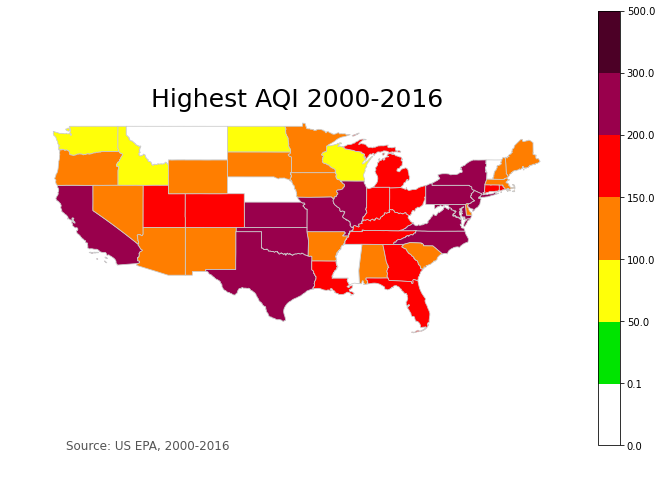

In [99]:
cmap, norm = mpl.colors.from_levels_and_colors([0,0.1,50,100,150,200,300,500], ['#FFFFFF','#00E400','#FFFF09','#FF7E00','#FF0000','#99004C','#4C0026'])

# set a variable to map
variable = 'Total AQI'
# set the range for the choropleth
vmin, vmax = 0,100 
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 8))
joined.plot(column=variable, cmap=cmap,norm = norm, linewidth=0.8, ax=ax, edgecolor='0.8');
ax.axis('off')


# add a title
ax.set_title('Highest AQI 2000-2016', fontdict={'fontsize': '25', 'fontweight' : '3'})
# add annotation
ax.annotate('Source: US EPA, 2000-2016',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='center', fontsize=12, color='#555555')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# add the colorbar
cbar = fig.colorbar(sm)
plt.savefig('Images/USAAQIMax.jpg', dpi=300)

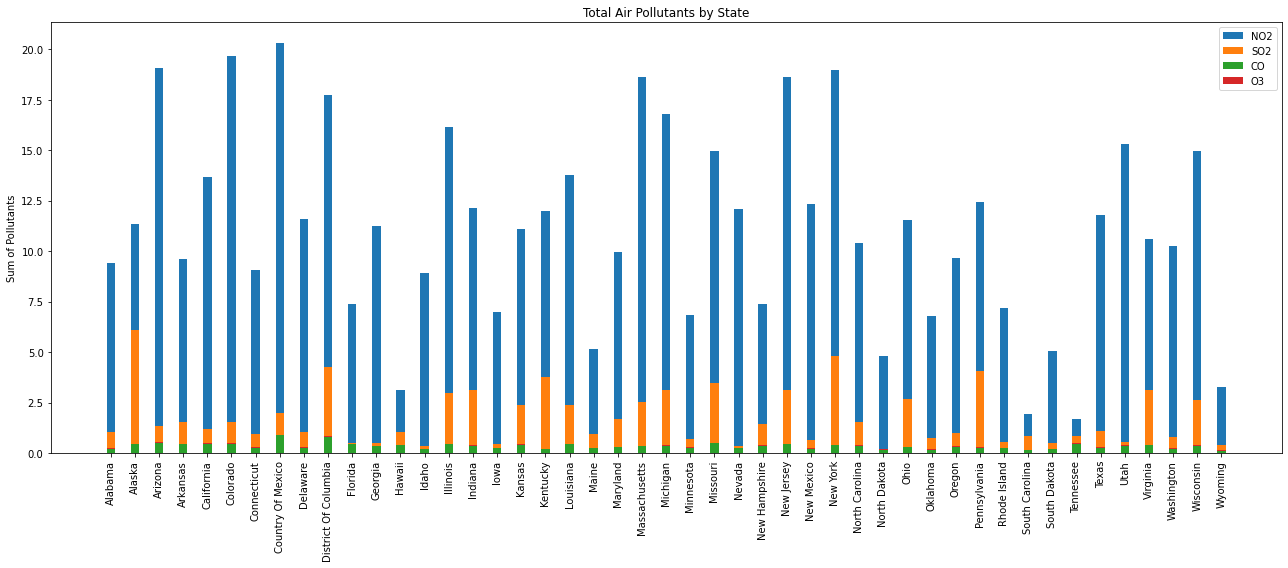

In [60]:
s4 = s.copy()
s4['SO2 Mean'] = s4['SO2 Mean']/1000
s4['NO2 Mean'] = s4['NO2 Mean']/1000

#corrected units to PPM
width = 0.35       

fig, ax = plt.subplots(figsize=(18,8))

ax.bar(s4.index, s3['NO2 Mean'], width, label='NO2')
ax.bar(s4.index, s3['SO2 Mean'], width, bottom=s4['NO2 Mean'],
       label='SO2')
ax.bar(s4.index, s3['CO Mean'], width, bottom = (s4['NO2 Mean'] + s4['SO2 Mean']), label='CO')
ax.bar(s4.index, s3['O3 Mean'], width, bottom=(s4['NO2 Mean'] + s4['SO2 Mean'] +s4['CO Mean']),
       label='O3')

ax.set_ylabel('Sum of Pollutants')
ax.set_title('Total Air Pollutants by State')
ax.legend()
ax.set_xticklabels(labels=s2.index,rotation=90)
fig.tight_layout() 
plt.show()

In [61]:
start = clean[(clean[['year']] == '2000').any(1)]
start = start.drop([
       'State', 'Date Local','year','O3 1st Max Hour','SO2 1st Max Hour', 'NO2 1st Max Hour', 'CO 1st Max Hour', 'month-day'], axis=1)

In [62]:
end = clean[(clean[['year']] == '2015').any(1)]

end = end.drop([
       'State', 'Date Local','year','O3 1st Max Hour','SO2 1st Max Hour', 'NO2 1st Max Hour', 'CO 1st Max Hour', 'month-day'], axis=1)

In [118]:
start.columns

Index(['NO2 Mean', 'NO2 1st Max Value', 'NO2 AQI', 'O3 Mean',
       'O3 1st Max Value', 'O3 AQI', 'SO2 Mean', 'SO2 1st Max Value',
       'SO2 AQI', 'CO Mean', 'CO 1st Max Value', 'CO AQI', 'Total AQI'],
      dtype='object')

In [ ]:
fig, axs = plt.subplots(4,3,figsize=(10,10))

axs=axs.flatten()
for i, col in enumerate(start.columns[:12]):   
    axs[i].hist(start[col], bins = 70, color='blue', label='2000', alpha = 0.5)
    axs[i].hist(end[col], bins=70, color='red', label='2015', alpha=0.5)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel(f'{col} values')
    axs[i].legend()

fig.tight_layout() 
plt.savefig('Images/overtime.jpg', dpi=300)

In [65]:
cols_list = start.columns
def tvalue2(df1, df2, col):
    tstat, pvalue = sc.ttest_ind(df1[~df1[col].isna()][col],df2[~df2[col].isna()][col])
    return col, tstat, pvalue
tvalue_list = []
for col in cols_list:
    tvalue_list.append(tvalue2(start,end,col))

In [66]:
start['Total AQI']=  start[['CO AQI','SO2 AQI','O3 AQI','NO2 AQI']].max(axis=1)
end['Total AQI'] = end[['CO AQI','SO2 AQI','O3 AQI','NO2 AQI']].max(axis=1)

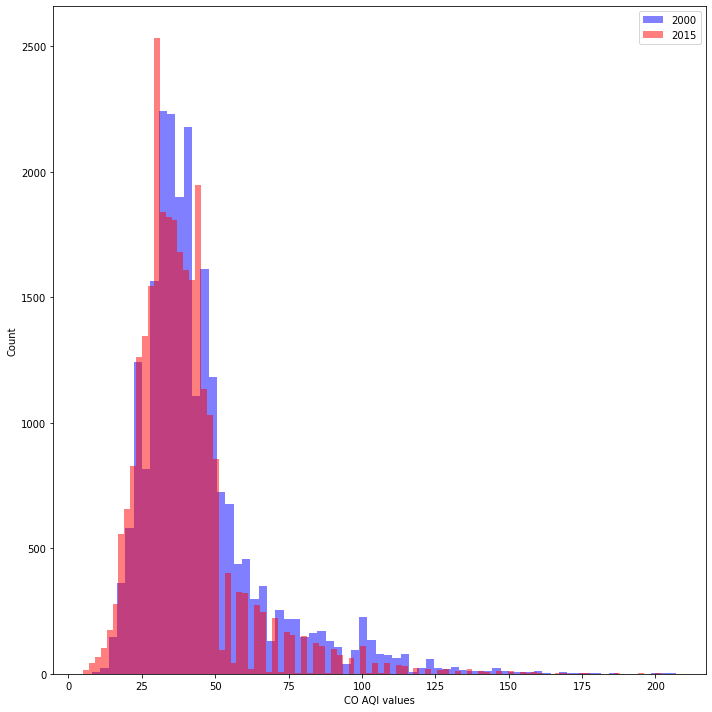

In [67]:
fig, axs = plt.subplots(figsize=(10,10))

axs.hist(start['Total AQI'], bins = 70, color='blue', label='2000', alpha = 0.5)
axs.hist(end['Total AQI'], bins=100, color='red', label='2015', alpha=0.5)
axs.set_ylabel('Count')
axs.set_xlabel(f'{col} values')
axs.legend()

fig.tight_layout() 
plt.savefig('Images/AQIovertime.jpg', dpi=300)

In [68]:
NO2corrSO2 = clean['NO2 Mean'].corr(clean['SO2 Mean'])
NO2corrCO = clean['NO2 Mean'].corr(data['CO Mean'])
NO2corrO3 = clean['NO2 Mean'].corr(data['O3 Mean'])
print(NO2corrSO2)
print(NO2corrCO)
print(NO2corrO3)
SO2corrSO2 = data['SO2 Mean'].corr(data['O3 Mean'])
SO2corrCO = data['SO2 Mean'].corr(data['CO Mean'])
print(SO2corrSO2)
print(SO2corrCO)
COcorrO3 = data['CO Mean'].corr(data['O3 Mean'])
print(COcorrO3)

0.34514655275466594
0.0388186419128735
-0.024486134256287442
-0.11040144027590058
0.21521637584882228
-0.33942643019387436


In [ ]:
#start2014 = clean[(clean[['year']] == '2014').any(1)]

#start2014 = start2014.drop([
#       'State', 'Date Local','year'], axis=1)

In [69]:
cols_list = start.columns
def tvalue2(df1, df2, col):
    tstat, pvalue = sc.ttest_ind(df1[~df1[col].isna()][col],df2[~df2[col].isna()][col])
    return col, tstat, pvalue
tvalue_list2 = []
for col in cols_list:
    tvalue_list2.append(tvalue2(start,end,col))

In [70]:
tvalue_list2

[('NO2 Mean', 90.92040313633478, 0.0),
 ('NO2 1st Max Value', 85.8771847507526, 0.0),
 ('NO2 AQI', 89.89946733507911, 0.0),
 ('O3 Mean', -22.843885802837274, 6.380903497476348e-115),
 ('O3 1st Max Value', 5.463820496178817, 4.681743507829133e-08),
 ('O3 AQI', -9.01342503718475, 2.0645867086720272e-19),
 ('SO2 Mean', 112.10284530288669, 0.0),
 ('SO2 1st Max Value', 102.89537279708327, 0.0),
 ('SO2 AQI', 109.49947074772325, 0.0),
 ('CO Mean', 90.62218420751637, 0.0),
 ('CO 1st Max Value', 88.80350064709424, 0.0),
 ('CO AQI', 88.49382100077675, 0.0),
 ('Total AQI', 31.880354500062733, 7.557337414576263e-221)]

In [71]:
t_value = []
p_value = []
column = []

for i in tvalue_list2:
    column.append(i[0])
    t_value.append(i[1])
    p_value.append(i[2])
d = {'Category':column, 'T Value': t_value, 'P Value':p_value}
start_to_end = pd.DataFrame(data=d)
start_to_end = start_to_end.set_index('Category')

In [72]:
start_to_end


,T Value,P Value
Category,,
NO2 Mean,90.920403,0.000000e+00
NO2 1st Max Value,85.877185,0.000000e+00
NO2 AQI,89.899467,0.000000e+00
O3 Mean,-22.843886,6.380903e-115
O3 1st Max Value,5.463820,4.681744e-08
O3 AQI,-9.013425,2.064587e-19
SO2 Mean,112.102845,0.000000e+00
SO2 1st Max Value,102.895373,0.000000e+00
SO2 AQI,109.499471,0.000000e+00


In [73]:
month = clean.copy()
month['Date Local'] = pd.to_datetime(month['Date Local'], format="%Y-%m-%d")

month = month.groupby([(month['Date Local'].dt.year),(month['Date Local'].dt.month)]).mean()
month = month.reset_index(1)
month.rename(columns={'Date Local': 'Month'}, inplace=True)
month = month.reset_index()
month.rename(columns={'Date Local': 'Year'}, inplace=True)

In [74]:
month

,Year,Month,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2000,1,23.399600,40.235294,12.773333,36.680000,0.013592,0.022965,10.183529,19.507451,3.844475,7.916980,10.527451,12.730196,0.945208,1.781804,10.151373,16.916732
1,2000,2,20.936676,37.831807,12.487927,35.103247,0.019711,0.031183,10.785179,26.666112,3.405941,7.424396,9.975853,11.908410,0.712425,1.377977,9.821815,12.726894
2,2000,3,17.724116,34.126654,12.705734,32.331443,0.025118,0.038594,10.449905,33.238815,3.151007,7.469471,10.212665,12.189666,0.535513,1.024417,8.952426,9.523329
3,2000,4,16.162970,32.677491,11.612100,30.941726,0.028414,0.042733,10.314947,37.596085,3.361897,8.511121,10.346975,14.031584,0.469515,0.837923,8.336299,7.853898
4,2000,5,14.995115,30.344294,11.447311,28.693485,0.031861,0.048075,10.259292,45.435505,3.390106,8.559204,9.753826,14.097070,0.421638,0.689364,7.848601,6.656756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2016,1,12.452615,23.700059,12.311658,22.052724,0.021000,0.029631,10.520211,27.449326,0.827654,1.789807,10.140744,2.294601,0.333076,0.550625,8.625073,5.433509
193,2016,2,11.001452,23.337443,12.163934,21.729836,0.024898,0.035318,10.444262,32.783279,0.714366,1.710197,10.144098,2.227423,0.307431,0.506303,8.129180,4.887795
194,2016,3,8.793754,20.577679,11.142219,19.081633,0.029416,0.039481,10.348214,36.800064,0.576530,1.412643,9.517219,1.789729,0.260817,0.407041,7.351403,3.900510
195,2016,4,8.335997,20.006286,10.500000,18.470000,0.032897,0.043374,10.112143,41.557857,0.632613,1.642893,10.498214,2.129286,0.256003,0.381976,7.291429,3.660000


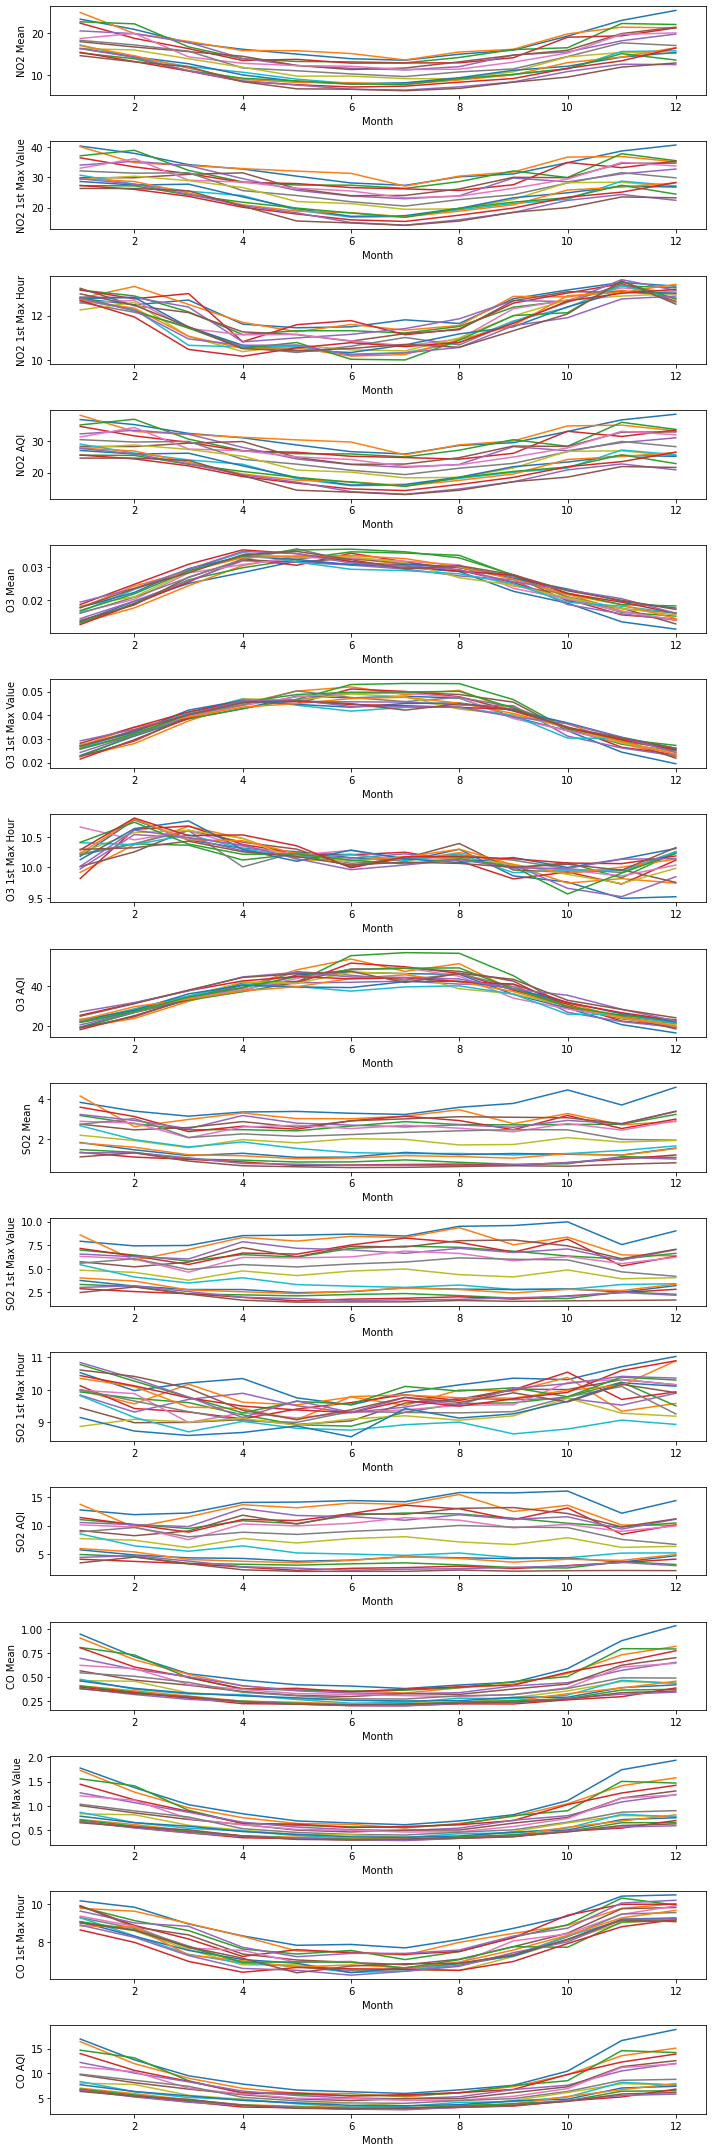

In [75]:
columns = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour',
       'NO2 AQI', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']


fig, axs = plt.subplots(16,1, figsize=(10,30))


for i in range(2000,2016):
    df = month[(month[['Year']] == i).any(1)]
    for i, col in enumerate(columns):
        axs[i].plot(df['Month'],df[col], label=i)
        axs[i].set_xlabel('Month')
        axs[i].set_ylabel(col)
       





fig.tight_layout() 

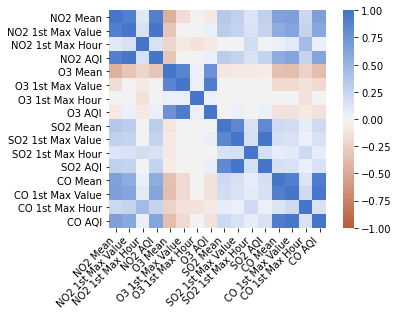

In [76]:
import seaborn as sns
corr = clean.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(25, 255, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [77]:
df2 = clean.copy()
df2['Date Local'] = pd.to_datetime(df2['Date Local'], format="%Y-%m-%d")

df2 = df2.groupby([df2['Date Local'].dt.month]).mean()
df2 = df2.reset_index()
df2.rename(columns={'Date Local': 'Month'}, inplace=True)


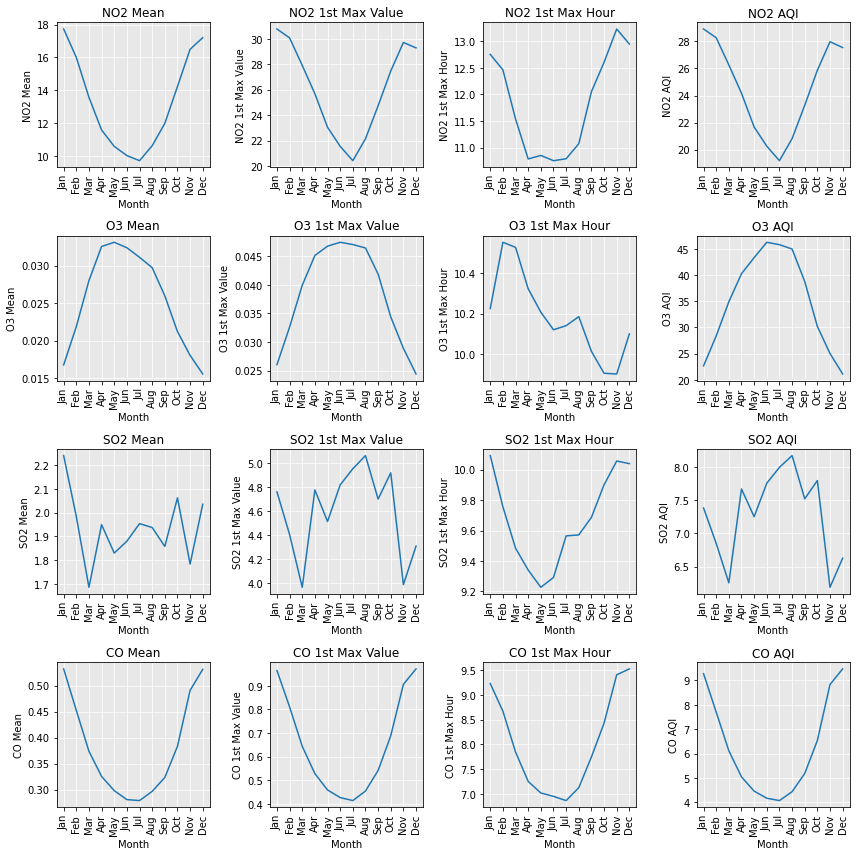

In [80]:
columns = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour',
       'NO2 AQI', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(4,4, figsize=(12,12))
axs=axs.flatten()

for i, col in enumerate(columns):
    axs[i].plot(df2['Month'],df2[col], label=i)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel(col)
    axs[i].set_facecolor('#E8E8E8')
    axs[i].grid(lw =.75, color='white')
    axs[i].set_title(col)
    axs[i].set_xticks(np.linspace(1,12,12))
    axs[i].set_xticklabels(m, rotation=90)


fig.tight_layout() 
plt.savefig('monthly.jpg', dpi=300)

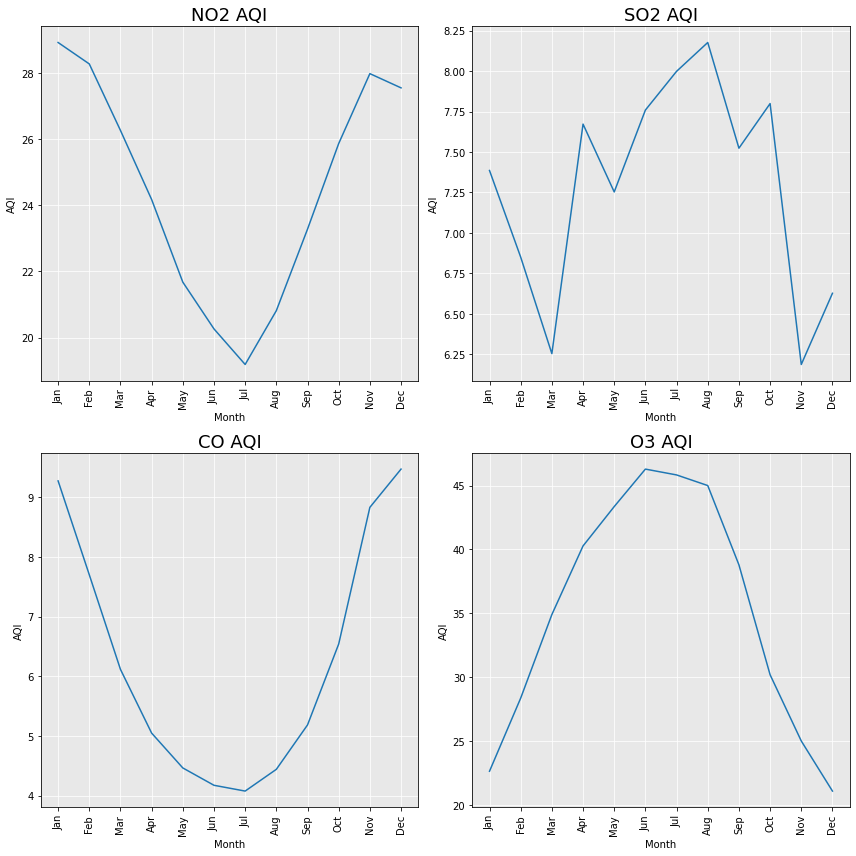

In [110]:
columns = ['NO2 AQI','SO2 AQI','CO AQI', 'O3 AQI']
m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(2,2, figsize=(12,12))
axs=axs.flatten()

for i, col in enumerate(columns):
    axs[i].plot(df2['Month'],df2[col], label=i)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('AQI')
    axs[i].set_facecolor('#E8E8E8')
    axs[i].grid(lw =.75, color='white')
    axs[i].set_title(col, fontsize = 18)
    axs[i].set_xticks(np.linspace(1,12,12))
    axs[i].set_xticklabels(m, rotation=90)



fig.tight_layout() 
plt.savefig('Images/22monthly.jpg', dpi=300)

In [81]:
clean['year'] = clean['year'].astype(int)

In [83]:
t_year_to_year = []
for i in range(2000,2015):
    yr = clean[(clean[['year']] == i).any(1)]
    yr = yr.drop(['State', 'Date Local','year','month-day'], axis=1)
    next_yr = clean[(clean[['year']] == i+1).any(1)]
    next_yr = next_yr.drop(['State', 'Date Local','year','month-day'], axis=1)
    cols_list = yr.columns
    t_year_to_year.append((i,i+1))
    for col in cols_list:
        t_year_to_year.append(tvalue2(yr, next_yr, col))

In [84]:
t_year_to_year


[(2000, 2001),
 ('NO2 Mean', -1.3736730149420469, 0.16955003413611294),
 ('NO2 1st Max Value', -1.2600180507780292, 0.20766935925558422),
 ('NO2 1st Max Hour', 0.9931852766528977, 0.3206249915050192),
 ('NO2 AQI', -2.0650087488135007, 0.03892786438207175),
 ('O3 Mean', -9.696086544007096, 3.29307355785537e-22),
 ('O3 1st Max Value', -9.508316987167698, 2.0292728632737306e-21),
 ('O3 1st Max Hour', -0.7292242395036521, 0.4658682866346485),
 ('O3 AQI', -8.452044622571714, 2.946665086511827e-17),
 ('SO2 Mean', 13.770823760144065, 4.666245013797741e-43),
 ('SO2 1st Max Value', 8.267059561487418, 1.41000823678559e-16),
 ('SO2 1st Max Hour', 6.52358720728139, 6.93688070209864e-11),
 ('SO2 AQI', 8.917191114199108, 4.957071082561365e-19),
 ('CO Mean', 11.320765244158205, 1.1355877936058636e-29),
 ('CO 1st Max Value', 8.532522573330278, 1.475661632324751e-17),
 ('CO 1st Max Hour', 3.9002680900711244, 9.622517631870746e-05),
 ('CO AQI', 9.182042818951963, 4.403538862832204e-20),
 (2001, 2002),
 

In [85]:
total_d = {'NO2 Mean':[],
 'NO2 1st Max Value':[],
 'NO2 1st Max Hour':[],
 'NO2 AQI':[],
 'O3 Mean':[],
 'O3 1st Max Value':[],
 'O3 1st Max Hour':[],
 'O3 AQI':[],
 'SO2 Mean':[],
 'SO2 1st Max Value':[],
 'SO2 1st Max Hour':[],
 'SO2 AQI':[],
 'CO Mean':[],
 'CO 1st Max Value':[],
 'CO 1st Max Hour':[],
 'CO AQI':[], 'row_index':[]}

for i in t_year_to_year:
    if len(i)==2:
        total_d['row_index'].append(i)

    if len(i)>2:

        total_d[i[0]].append((i[1],i[2]))

        

In [86]:
year_to_year = pd.DataFrame(data=total_d)
year_to_year = year_to_year.set_index('row_index')
year_to_year.drop(['NO2 1st Max Hour', 'SO2 1st Max Hour', 'CO 1st Max Hour', 'O3 1st Max Hour'], axis=1)


,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
row_index,,,,,,,,,,,,
"(2000, 2001)","(-1.3736730149420469, 0.16955003413611294)","(-1.2600180507780292, 0.20766935925558422)","(-2.0650087488135007, 0.03892786438207175)","(-9.696086544007096, 3.29307355785537e-22)","(-9.508316987167698, 2.0292728632737306e-21)","(-8.452044622571714, 2.946665086511827e-17)","(13.770823760144065, 4.666245013797741e-43)","(8.267059561487418, 1.41000823678559e-16)","(8.917191114199108, 4.957071082561365e-19)","(11.320765244158205, 1.1355877936058636e-29)","(8.532522573330278, 1.475661632324751e-17)","(9.182042818951963, 4.403538862832204e-20)"
"(2001, 2002)","(11.744644620644914, 8.364431496421102e-32)","(12.875945858425949, 7.161565522438717e-38)","(12.916537205087426, 4.237872311905944e-38)","(-11.354434738485454, 7.733619610207555e-30)","(-6.318533757681285, 2.664953589098154e-10)","(-7.185402226733463, 6.803653364656983e-13)","(11.917082081764988, 1.0787858583755556e-32)","(12.4280958334801, 2.1004339184511203e-35)","(12.987883069254329, 1.6785787234031333e-38)","(1.7866568191893355, 0.07399963255599072)","(5.825564822801804, 5.730230423188112e-09)","(4.752894771019408, 2.011373120538659e-06)"
"(2002, 2003)","(4.982838098864042, 6.289254543800658e-07)","(5.845173519438423, 5.095554604179981e-09)","(5.868512574770047, 4.428242660057574e-09)","(10.204331528988913, 2.017262919157123e-24)","(11.079354474218992, 1.7214997365954133e-28)","(11.843909179986284, 2.587562361139641e-32)","(-4.166956659693737, 3.0927447252609775e-05)","(-2.9453577378452356, 0.003227481208751176)","(-2.7071666296425407, 0.006788603931266016)","(2.4159411972651395, 0.015698588681645816)","(4.113141600620595, 3.910103902535059e-05)","(2.7041834295580633, 0.006849846860876922)"
"(2003, 2004)","(8.97149951308223, 3.04294939013762e-19)","(9.040667620709296, 1.62191745652138e-19)","(9.044754315212558, 1.5624975744331276e-19)","(5.405744056570953, 6.489136589846237e-08)","(6.690956613459898, 2.2449758190871112e-11)","(9.463612030315794, 3.123630525108179e-21)","(0.32228534834747424, 0.7472381380525002)","(0.9806396140423483, 0.3267761481011906)","(0.7408330823864507, 0.45879880083942814)","(12.622055021842257, 1.8594850172153736e-36)","(12.516861239994126, 6.999239201357099e-36)","(12.696702438031384, 7.211934652233668e-37)"
"(2004, 2005)","(0.4609623982478188, 0.6448279948108911)","(-2.207073638466174, 0.027314359980697485)","(-2.1494332488669627, 0.03160582702320581)","(-7.377742446788576, 1.6399483411044976e-13)","(-9.77961225824171, 1.45682481394015e-22)","(-11.437951255893392, 2.998950351081775e-30)","(-1.7660863978516437, 0.07738869534483946)","(-0.7826513012895308, 0.4338363661556761)","(-0.2390821929181534, 0.8110430283002967)","(10.475214038918082, 1.2086070162433254e-25)","(8.789691328977796, 1.5559057643459972e-18)","(9.752775079657619, 1.8973467242534756e-22)"
"(2005, 2006)","(4.545715229619797, 5.488916700841489e-06)","(2.3068380434672564, 0.021068298493206454)","(2.324603070207531, 0.020097552044951488)","(-0.8571584462931449, 0.39136181766372125)","(3.6859832916564508, 0.0002280844856703619)","(5.262299611862712, 1.429050051555143e-07)","(8.906383380954432, 5.461525196372093e-19)","(9.43427175113455, 4.1152798429783135e-21)","(9.195607204214078, 3.880911899261665e-20)","(-0.64272564878144, 0.5204053587951643)","(-2.750019717558652, 0.005961510167411955)","(-2.321991066471661, 0.02023778809869386)"
"(2006, 2007)","(16.178552286968525, 9.946112433759725e-59)","(16.22788022010068, 4.476844811374476e-59)","(16.209812303445545, 5.998952057728337e-59)","(-5.411931173246943, 6.262355517080395e-08)","(-3.1595485641057293, 0.0015810422206689126)","(-2.4601886480293276, 0.013889627307662735)","(9.86491472706483, 6.189034878287092e-23)","(9.05043330841736, 1.471793183760644e-19)","(9.81970162988763, 9.693427465066412e-23)","(13.892419052950261, 8.434085077074038e-44)","(18.155995741627905, 1

In [87]:
def color_map(val):
    if val[0]<0 and val[1]<.025:
        color = 'red'
    elif val[0]>0 and val[1]<.025:  
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color

In [88]:
significant = year_to_year.style.applymap(color_map)

In [89]:
# Checking statistical significance between years, green indicates a decrease in pollution, black is insignificant, red is significant increase
significant

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
row_index,,,,,,,,,,,,,,,,
"(2000, 2001)","(-1.3736730149420469, 0.16955003413611294)","(-1.2600180507780292, 0.20766935925558422)","(0.9931852766528977, 0.3206249915050192)","(-2.0650087488135007, 0.03892786438207175)","(-9.696086544007096, 3.29307355785537e-22)","(-9.508316987167698, 2.0292728632737306e-21)","(-0.7292242395036521, 0.4658682866346485)","(-8.452044622571714, 2.946665086511827e-17)","(13.770823760144065, 4.666245013797741e-43)","(8.267059561487418, 1.41000823678559e-16)","(6.52358720728139, 6.93688070209864e-11)","(8.917191114199108, 4.957071082561365e-19)","(11.320765244158205, 1.1355877936058636e-29)","(8.532522573330278, 1.475661632324751e-17)","(3.9002680900711244, 9.622517631870746e-05)","(9.182042818951963, 4.403538862832204e-20)"
"(2001, 2002)","(11.744644620644914, 8.364431496421102e-32)","(12.875945858425949, 7.161565522438717e-38)","(2.2130744735970986, 0.026897458748101188)","(12.916537205087426, 4.237872311905944e-38)","(-11.354434738485454, 7.733619610207555e-30)","(-6.318533757681285, 2.664953589098154e-10)","(-0.4921571244774655, 0.6226106480196569)","(-7.185402226733463, 6.803653364656983e-13)","(11.917082081764988, 1.0787858583755556e-32)","(12.4280958334801, 2.1004339184511203e-35)","(5.536487731462926, 3.102983586418076e-08)","(12.987883069254329, 1.6785787234031333e-38)","(1.7866568191893355, 0.07399963255599072)","(5.825564822801804, 5.730230423188112e-09)","(3.1051252697288363, 0.0019031531222334585)","(4.752894771019408, 2.011373120538659e-06)"
"(2002, 2003)","(4.982838098864042, 6.289254543800658e-07)","(5.845173519438423, 5.095554604179981e-09)","(-1.4197000020357375, 0.15570203062796634)","(5.868512574770047, 4.428242660057574e-09)","(10.204331528988913, 2.017262919157123e-24)","(11.079354474218992, 1.7214997365954133e-28)","(-0.5966110820834366, 0.5507701004148414)","(11.843909179986284, 2.587562361139641e-32)","(-4.166956659693737, 3.0927447252609775e-05)","(-2.9453577378452356, 0.003227481208751176)","(-3.9334797973394626, 8.38515800692837e-05)","(-2.7071666296425407, 0.006788603931266016)","(2.4159411972651395, 0.015698588681645816)","(4.113141600620595, 3.910103902535059e-05)","(0.07342834193947931, 0.9414655943210941)","(2.7041834295580633, 0.006849846860876922)"
"(2003, 2004)","(8.97149951308223, 3.04294939013762e-19)","(9.040667620709296, 1.62191745652138e-19)","(1.1007152712114106, 0.2710269144622603)","(9.044754315212558, 1.5624975744331276e-19)","(5.405744056570953, 6.489136589846237e-08)","(6.690956613459898, 2.2449758190871112e-11)","(1.8768478980554275, 0.0605458795736577)","(9.463612030315794, 3.123630525108179e-21)","(0.32228534834747424, 0.7472381380525002)","(0.9806396140423483, 0.3267761481011906)","(1.2200682893657875, 0.2224458480719441)","(0.7408330823864507, 0.45879880083942814)","(12.622055021842257, 1.8594850172153736e-36)","(12.516861239994126, 6.999239201357099e-36)","(-0.4121380104150143, 0.6802403761151972)","(12.696702438031384, 7.211934652233668e-37)"
"(2004, 2005)","(0.4609623982478188, 0.6448279948108911)","(-2.207073638466174, 0.027314359980697485)","(0.7532650912219953, 0.45129489856747806)","(-2.1494332488669627, 0.03160582702320581)","(-7.377742446788576, 1.6399483411044976e-13)","(-9.77961225824171, 1.45682481394015e-22)","(-1.4981192336663558, 0.13410986947585282)","(-11.437951255893392, 2.998950351081775e-30)","(-1.7660863978516437, 0.07738869534483946)","(-0.7826513012895308, 0.4338363661556761)","(1.8193843157072072, 0.06886000939987048)","(-0.2390821929181534, 0.8110430283002967)","(10.475214038918082, 1.2086070162433254e-25)","(8.789691328977796, 1.5559057643459972e-18)","(5.043509813897725, 4.589893212275199e-07)","(9.752775079657619, 1.8973467242534756e-22)"
"(2005, 2006)","(4.545715229619797, 5.488916700841489e-06)","(2.3068380434672564, 0.021

In [90]:
g = clean.copy()
g['year'] = g['Date Local'].apply(lambda x: x[0:4])
g['month']=g['Date Local'].apply(lambda x: x[5:7])
g = g[(g[['year']] == '2015').any(1)]
g = g.drop(['Date Local'], axis=1)
g = g.groupby(['State','month']).mean()

g=g.reset_index(1)
g['Month'] = g['month'].astype(int)
g = g.set_index(g['Month'], append=True)
g = g.drop(['month'],axis=1)

In [91]:
map_df = gpd.read_file('/home/slindhult/assignments/Capstone-1/data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
statelist = map_df['NAME']
states_repeat = statelist.repeat(12)
nums_repeat= [i for i in range(1,13)]*52
master_states = pd.DataFrame(states_repeat)
master_states['Month'] = nums_repeat
master_states = master_states.set_index('NAME')

In [92]:
join_month = map_df.set_index('NAME').join(master_states, how='left')
join_month['month']=join_month['Month']
join_month = join_month.set_index(join_month['month'],append=True)
join_month.index.names= ['State', 'Month']
join_month = join_month.drop(['Month','month'],axis=1)


In [93]:
df2015 = join_month.join(g)

In [94]:
df2015 = df2015.drop(['Month'],axis=1)
df2015 = df2015.reset_index()
df2015 = df2015.fillna(0)
df2015['Total AQI'] = df2015[['CO AQI','SO2 AQI','O3 AQI','NO2 AQI']].max(axis=1)
df2015 = df2015[~((df2015['State'] == 'Alaska') | (df2015['State']== 'Hawaii') | (df2015['State']== 'Puerto Rico'))]

In [115]:
cmap, norm = mpl.colors.from_levels_and_colors([0,0.1,50,100,150,200,300,500], ['#FFFFFF','#00E400','#FFFF09','#FF7E00','#FF0000','#99004C','#4C0026'])

def plot_month(df_input, month, variable):
    df_input = df_input[(df_input['Month'] == month)]

    vmin, vmax = 0,500 
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(12, 8))
    df_input.plot(column=variable, cmap=cmap, norm=norm, linewidth=1.2, ax=ax, edgecolor='0.8');
    ax.axis('off')
    
    d = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7: 'Jul',8: 'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

    # add a title
    ax.set_title(f'{variable}  {d[month]} 2015', fontdict={'fontsize': '25', 'fontweight' : '3'})
    # add annotation
    ax.annotate('Source: US EPA, 2000-2016',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='center', fontsize=12, color='#555555')

    # Create a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

    # add the colorbar
    cbar = fig.colorbar(sm)

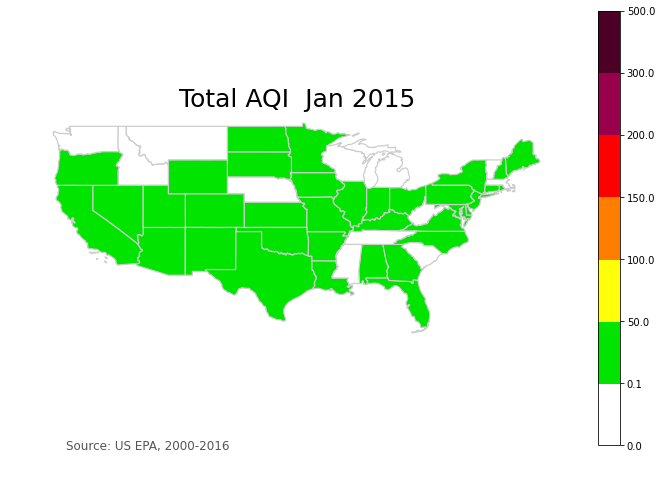

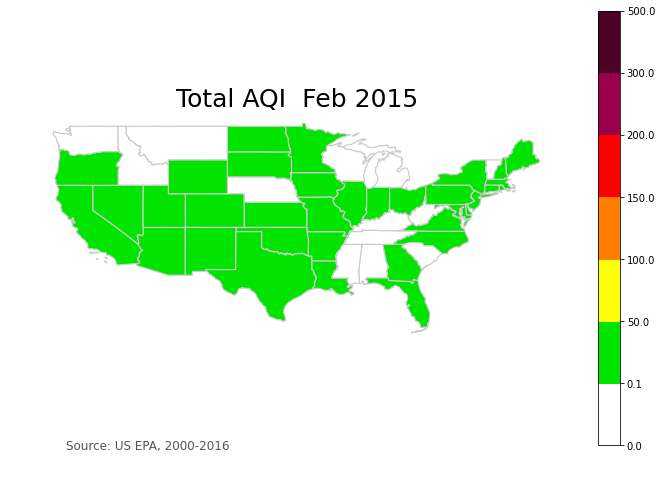

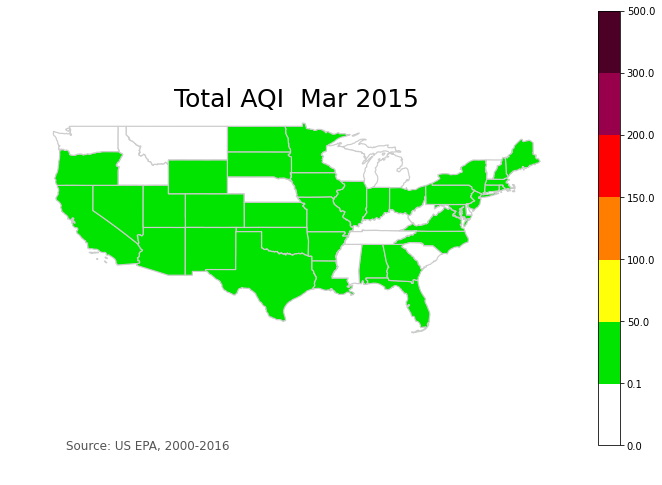

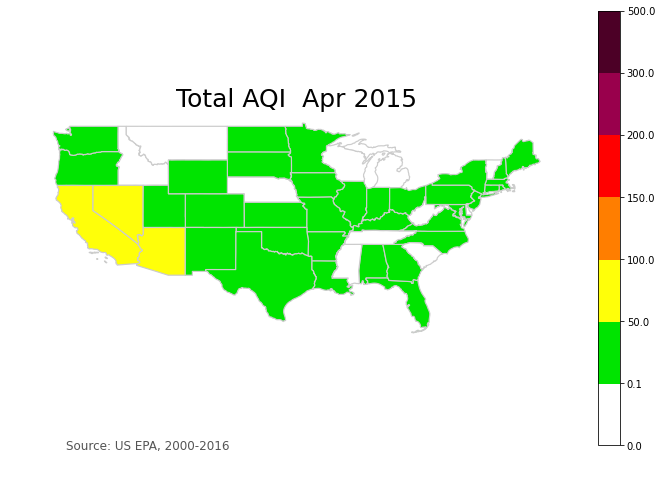

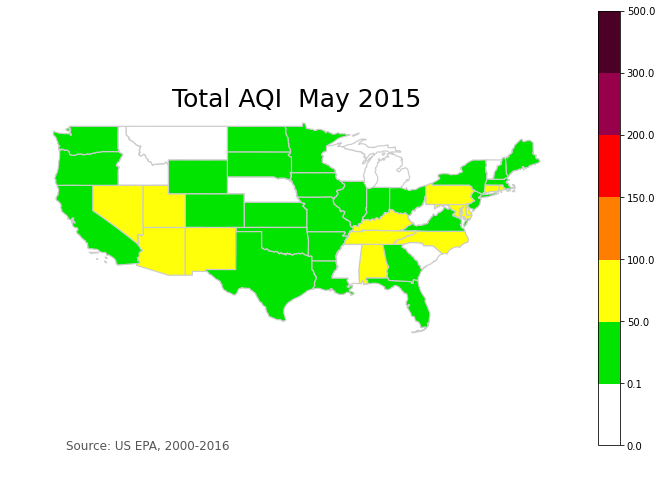

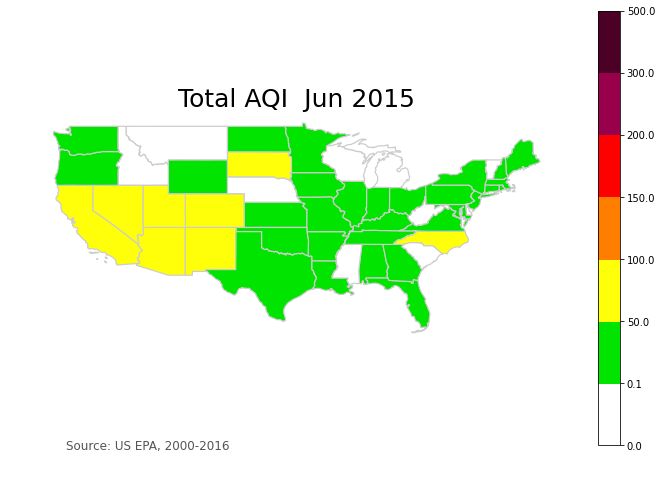

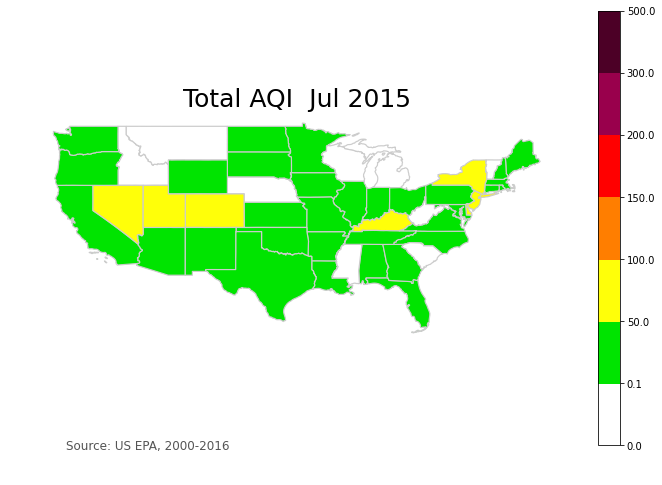

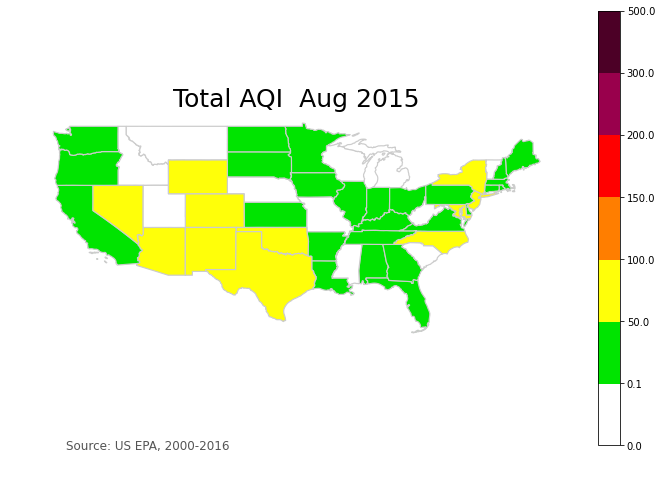

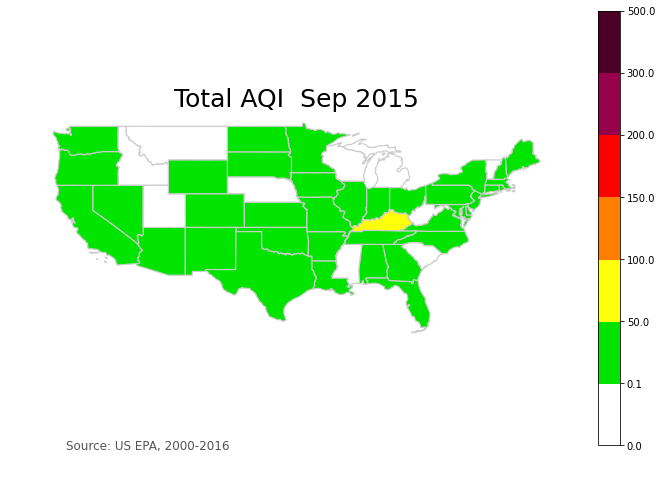

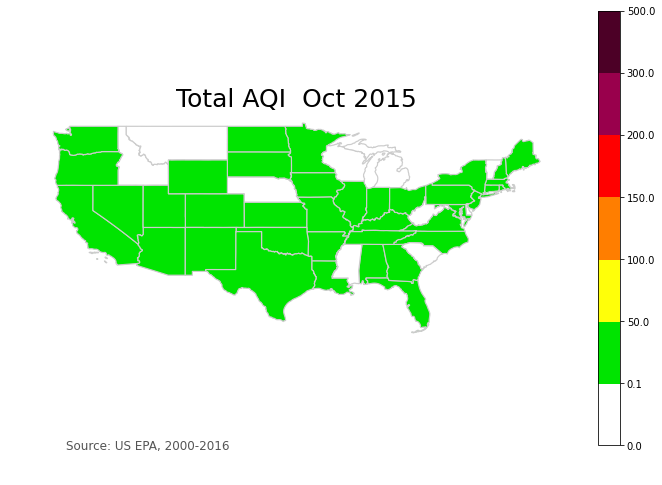

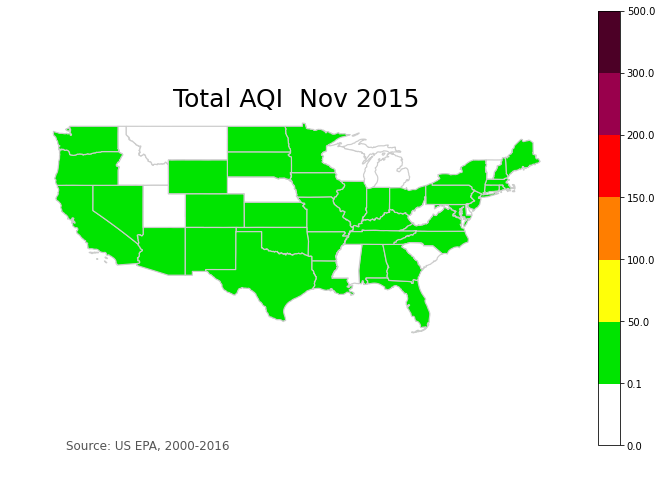

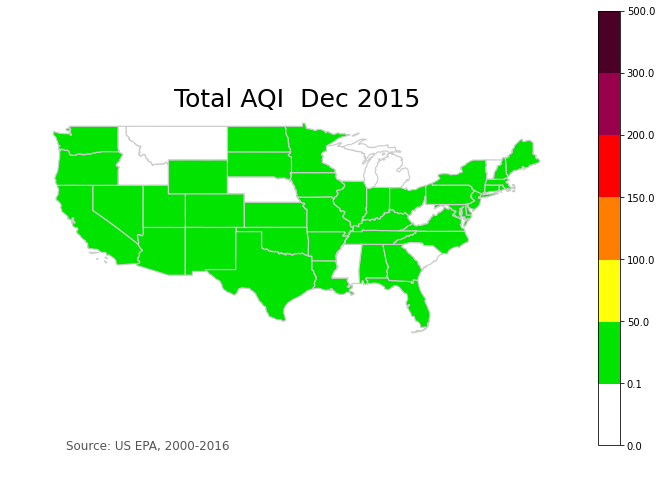

In [116]:
for i in range(1,13):
    plot_month(df2015, i, 'Total AQI')
    

    plt.savefig(str(i)+'_usa.jpg', dpi=300)

In [ ]:
#ImageMagick code to make gif: convert -delay 60 -loop 0 1_usa.jpg 2_usa.jpg 3_usa.jpg 4_usa.jpg 5_usa.jpg 6_usa.jpg 7_usa.jpg 8_usa.jpg 9_usa.jpg 10_usa.jpg 11_usa.jpg 12_usa.jpg monthlyaqi.gif

In [97]:
df2015

,State,Month,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Total AQI
0,Alabama,1,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,...,21.000000,1.466667,2.500000,7.000000,3.000000,0.234706,0.335000,6.000000,3.000000,21.000000
1,Alabama,2,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alabama,3,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,...,33.928571,1.242529,5.633929,10.892857,8.964286,0.205557,0.365714,9.017857,3.357143,33.928571
3,Alabama,4,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,...,36.428571,0.587681,2.594643,10.053571,4.321429,0.201441,0.334821,10.696429,3.250000,36.428571
4,Alabama,5,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,...,53.035714,2.109294,7.751786,10.410714,13.214286,0.221375,0.376250,9.089286,3.857143,53.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Wyoming,8,56,01779807,0400000US56,56,WY,00,251458544898,1867670745,...,54.064516,0.508365,3.033871,13.000000,5.566667,0.086393,0.140903,8.354839,1.258065,54.064516
620,Wyoming,9,56,01779807,0400000US56,56,WY,00,251458544898,1867670745,...,44.200000,0.590543,2.516667,13.466667,3.933333,0.054481,0.103400,10.300000,0.933333,44.200000
621,Wyoming,10,56,01779807,0400000US56,56,WY,00,251458544898,1867670745,...,36.258065,0.464009,2.179032,11.129032,3.612903,0.053285,0.106323,8.080645,1.000000,36.258065
622,Wyoming,11,56,01779807,0400000US56,56,WY,00,251458544898,1867670745,...,36.166667,0.188354,0.471667,10.466667,0.266667,0.078708,0.132483,7.366667,1.166667,36.166667
